#  Multi-Class-Classification
---

### Objectives:

- Use one-hot coding for categorical variables.

- Implement logistic regression for multiclass classification using the **One-versus-All (OvA)** and **One-versus-One (OvO)** strategies.

- Evaluate model performance using appropriate metrics.

### Installs:

In [0]:
%%capture
%pip install numpy==2.4.0
%pip install pandas==2.3.3
%pip install scikit-learn==1.8.0
%pip install matplotlib==3.10.8
%pip install seaborn==0.13.0

In [0]:
# Command to restart the kernel and update the installed libraries
%restart_python

### Imports:

In [0]:
# Data Analize and Visualization
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
import seaborn as sns

# Data Modeling / Model Linear / Metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsOneClassifier
from sklearn.metrics import accuracy_score, classification_report

# Warnings
import warnings
warnings.filterwarnings('ignore')

### Load the data

In [0]:
df = pd.read_csv('./data/Obesity-level-prediction-dataset.csv')

### Verify successful load with some randomly selected records


In [0]:
df.sample(9)

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
1674,Male,27.939820,1.694642,99.709329,yes,yes,2.772027,2.454432,Sometimes,no,1.000000,no,0.858554,0.051268,no,Public_Transportation,Obesity_Type_II
657,Female,19.052833,1.546551,42.069992,no,yes,3.000000,1.735493,Sometimes,no,2.318736,no,1.193486,0.745680,no,Public_Transportation,Insufficient_Weight
460,Female,18.000000,1.620000,55.000000,yes,yes,2.000000,3.000000,Frequently,no,1.000000,no,1.000000,1.000000,no,Public_Transportation,Normal_Weight
60,Female,21.000000,1.550000,49.000000,yes,yes,2.000000,3.000000,Sometimes,no,3.000000,no,3.000000,1.000000,Sometimes,Public_Transportation,Normal_Weight
1781,Male,33.722449,1.712905,103.276087,yes,yes,2.525884,2.040582,Sometimes,no,1.000000,no,1.670360,0.023959,no,Public_Transportation,Obesity_Type_II
1018,Male,22.000000,1.691303,80.539000,yes,yes,2.000000,2.038373,Sometimes,no,2.000000,no,2.708250,1.506576,Sometimes,Public_Transportation,Overweight_Level_II
1883,Female,26.000000,1.631332,111.829957,yes,yes,3.000000,3.000000,Sometimes,no,2.559750,no,0.000000,0.237307,Sometimes,Public_Transportation,Obesity_Type_III
163,Male,25.000000,1.890000,75.000000,no,no,3.000000,3.000000,Frequently,no,2.000000,yes,3.000000,0.000000,no,Public_Transportation,Normal_Weight
870,Female,35.483601,1.647514,73.916920,yes,no,3.000000,2.725012,Sometimes,no,1.622440,no,0.902661,0.000000,Sometimes,Automobile,Overweight_Level_I


### Understand the data
---

The dataset used is the "Obesity Risk Prediction" dataset, publicly available in the <a href="https://archive.ics.uci.edu/dataset/544/estimation+of+obesity+levels+based+on+eating+habits+and+physical+condition">UCI Library</a> under the <a href="https://creativecommons.org/licenses/by/4.0/legalcode">CCA 4.0</a> license. The dataset has 17 attributes in total, along with 2,111 samples.


* **Gender** *Categorical* -Participant's gender

* **Age** *Continuous* -Participant's age

* **Height** *Continuous* -Participant's height

* **Weight** *Continuous* -Participant's weight

* **family_history_with_overweight** *Binary* -Has a family member suffered or suffers from overweight?

* **FAVC** *Binary* -Do you eat high caloric food frequently?

* **FCVC** *Integer* -Do you usually eat vegetables in your meals?

* **NCP** *Continuous* -How many main meals do you have daily?

* **CAEC** *Categorical* -Do you eat any food between meals?

* **SMOKE** *Binary* -Do you smoke?

* **CH2O** *Continuous* -How much water do you drink daily?

* **SCC** *Binary* -Do you monitor the calories you eat daily?

* **FAF** *Continuous* -How often do you have physical activity?

* **TUE** *Integer* -Time using technological devices (cell phone, TV, etc.)

* **CALC** *Categorical* -How often do you drink alcohol?

* **MTRANS** *Categorical* -Which transportation do you usually use?

* **NObeyesdad** *Categorical* -Obesity level (Target Variable)

### Explore the data
First, consider a statistical summary of the data.

In [0]:
df.describe()

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000
mean,24.312600,1.701677,86.586058,2.419043,2.685628,2.008011,1.010298,0.657866
std,6.345968,0.093305,26.191172,0.533927,0.778039,0.612953,0.850592,0.608927
min,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,19.947192,1.630000,65.473343,2.000000,2.658738,1.584812,0.124505,0.000000
50%,22.777890,1.700499,83.000000,2.385502,3.000000,2.000000,1.000000,0.625350
75%,26.000000,1.768464,107.430682,3.000000,3.000000,2.477420,1.666678,1.000000
max,61.000000,1.980000,173.000000,3.000000,4.000000,3.000000,3.000000,2.000000


In [0]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Age                             2111 non-null   float64
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  SCC                             2111 non-null   object 
 12  FAF                             21

In [0]:
df.isnull().sum()

Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64

Visualize the distribution of the target variable to understand the class balance.

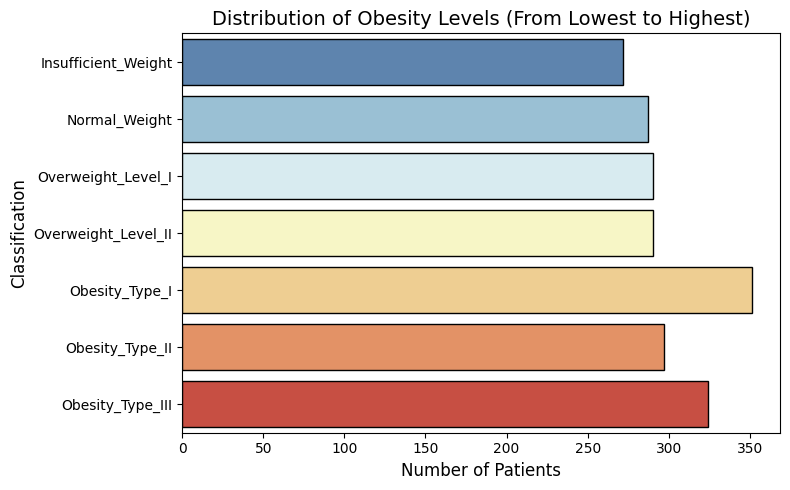

In [0]:
# Define the Logical Order (Crucial for Ordinal Data)

level_order = [
    'Insufficient_Weight', 
    'Normal_Weight', 
    'Overweight_Level_I', 
    'Overweight_Level_II', 
    'Obesity_Type_I', 
    'Obesity_Type_II', 
    'Obesity_Type_III'   
]

# Figure
plt.figure(figsize = (8, 5))

# Count Plot
ax = sns.countplot(
    y = 'NObeyesdad',
    data = df,
    order = level_order,
    edgecolor = 'black',
    palette = 'RdYlBu_r',
)

plt.title('Distribution of Obesity Levels (From Lowest to Highest)', fontsize = 14)
plt.xlabel('Number of Patients', fontsize = 12)
plt.ylabel('Classification', fontsize = 12)

plt.tight_layout()
plt.show()

### Preprocessing the data

Extract the input features and label

In [0]:
X = df.drop(columns = ['NObeyesdad']).copy()
y = df['NObeyesdad'].copy()

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, shuffle = True, random_state = 33)
print(f'The shape X_train: {X_train.shape}')
print(f'The shape y_train: {y_train.shape}')
print(f'The shape X_test: {X_test.shape}')
print(f'The shape y_test: {y_test.shape}')

The shape X_train: (1688, 16)
The shape y_train: (1688,)
The shape X_test: (423, 16)
The shape y_test: (423,)


In [0]:
X_train.sample(5)

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS
50,Female,21.000000,1.610000,54.500000,yes,yes,3.000000,3.000000,Sometimes,no,3.000000,no,0.000000,1.000000,Sometimes,Walking
422,Male,19.000000,1.750000,58.000000,no,yes,2.000000,3.000000,Sometimes,no,2.000000,no,2.000000,0.000000,Sometimes,Bike
1377,Male,29.633715,1.834842,105.199360,yes,yes,2.805533,3.000000,Sometimes,no,1.882847,no,2.000000,0.707780,Sometimes,Automobile
1565,Male,30.958051,1.906821,128.856677,yes,yes,2.633855,3.000000,Sometimes,no,1.619305,no,1.847802,0.424612,Sometimes,Public_Transportation
701,Male,17.282945,1.821514,59.605028,yes,yes,2.613249,3.712183,Sometimes,no,2.000000,no,2.002997,0.174848,no,Automobile


In [0]:
# Columns continuos
continuos_columns = X_train.select_dtypes(include = ['float64']).columns.tolist()
print(f'\nColumns Continuos: {continuos_columns}')

categorical_columns = X_train.select_dtypes(include = ['object']).columns.tolist()
print(f'\nColumns Categorical: {categorical_columns}')


Columns Continuos: ['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']

Columns Categorical: ['Gender', 'family_history_with_overweight', 'FAVC', 'CAEC', 'SMOKE', 'SCC', 'CALC', 'MTRANS']


In [0]:
preprocessor = ColumnTransformer(
    transformers = [
        ('one_hot_features', OneHotEncoder(sparse_output = False, drop = 'first'), categorical_columns),
        ('continuos_features', StandardScaler(), continuos_columns)
    ],
    remainder = 'passthrough'
)

### Data Training preprocessing

In [0]:
X_train_preprocessed = preprocessor.fit_transform(X_train)
pd.DataFrame(X_train_preprocessed, columns = preprocessor.get_feature_names_out(X_train.columns)).head()

,one_hot_features__Gender_Male,one_hot_features__family_history_with_overweight_yes,one_hot_features__FAVC_yes,one_hot_features__CAEC_Frequently,one_hot_features__CAEC_Sometimes,one_hot_features__CAEC_no,one_hot_features__SMOKE_yes,one_hot_features__SCC_yes,one_hot_features__CALC_Frequently,one_hot_features__CALC_Sometimes,one_hot_features__CALC_no,one_hot_features__MTRANS_Bike,one_hot_features__MTRANS_Motorbike,one_hot_features__MTRANS_Public_Transportation,one_hot_features__MTRANS_Walking,continuos_features__Age,continuos_features__Height,continuos_features__Weight,continuos_features__FCVC,continuos_features__NCP,continuos_features__CH2O,continuos_features__FAF,continuos_features__TUE
0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.421681,-0.600517,0.479013,0.967978,-1.107927,-1.641599,0.076075,0.109043
1,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,-0.998477,0.709046,0.004908,1.090691,0.392850,-0.005142,-0.030591,0.581680
2,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,-0.728168,0.003224,-0.304169,-1.463186,0.392850,-0.005142,0.838416,0.581680
3,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,-0.137962,0.553293,1.754857,1.090691,0.392850,1.375671,0.328369,0.205256
4,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,-0.357529,0.081738,-1.314163,0.863899,0.392850,-1.590290,1.401344,1.205162


In [0]:
logical_ordenation = {
    'Insufficient_Weight': 0,
    'Normal_Weight': 1,
    'Overweight_Level_I': 2,    
    'Overweight_Level_II': 3, 
    'Obesity_Type_I': 4,
    'Obesity_Type_II': 5,   
    'Obesity_Type_III': 6, 
      
}
y_train = y_train.map(logical_ordenation)

In [0]:
y_train.head()

1664    5
417     3
1047    3
2012    6
512     0
Name: NObeyesdad, dtype: int64

### Data Test preprocessing

In [0]:
X_test_preprocessed = preprocessor.transform(X_test)
pd.DataFrame(X_test_preprocessed, columns = preprocessor.get_feature_names_out(X_test.columns)).head()

,one_hot_features__Gender_Male,one_hot_features__family_history_with_overweight_yes,one_hot_features__FAVC_yes,one_hot_features__CAEC_Frequently,one_hot_features__CAEC_Sometimes,one_hot_features__CAEC_no,one_hot_features__SMOKE_yes,one_hot_features__SCC_yes,one_hot_features__CALC_Frequently,one_hot_features__CALC_Sometimes,one_hot_features__CALC_no,one_hot_features__MTRANS_Bike,one_hot_features__MTRANS_Motorbike,one_hot_features__MTRANS_Public_Transportation,one_hot_features__MTRANS_Walking,continuos_features__Age,continuos_features__Height,continuos_features__Weight,continuos_features__FCVC,continuos_features__NCP,continuos_features__CH2O,continuos_features__FAF,continuos_features__TUE
0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,-0.462328,0.157476,-0.258647,-0.801778,0.392850,-0.005142,2.012342,1.030976
1,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.271252,1.352076,-0.183345,-0.801778,0.392850,-0.005142,-0.030591,0.581680
2,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,-0.792621,1.215657,2.072598,1.090691,0.392850,1.139846,0.587420,0.188919
3,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,-0.994532,-0.041156,-1.388166,-2.539821,1.069748,-1.613832,-0.444231,0.581680
4,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,-1.145504,0.033821,0.477224,-0.801778,0.392850,-0.005142,0.838119,-1.001585


In [0]:
y_test = y_test.map(logical_ordenation)

In [0]:
y_test.head()

1065    3
401     1
1971    6
573     0
1354    4
Name: NObeyesdad, dtype: int64

### Logistic Regression with One-vs-All

In the One-vs-All approach:

* The algorithm trains a single binary classifier for each class.
* Each classifier learns to distinguish a single class from all the others combined.
* If there are k classes, k classifiers are trained.
* During prediction, the algorithm evaluates all classifiers on each input, and selects the class with the highest confidence score as the predicted class.

#### Advantages:
* Simpler and more efficient in terms of the number of classifiers (k)
* Easier to implement for algorithms that naturally provide confidence scores (e.g., logistic regression, SVM).

#### Disadvantages:
* Classifiers may struggle with class imbalance since each binary classifier must distinguish between one class and the rest.
* Requires the classifier to perform well even with highly imbalanced datasets, as the "all" group typically contains more samples than the "one" class.``

#### Train a logistic regression model using the One-vs-All strategy and evaluate its performance.


In [0]:
model_ova = LogisticRegression(max_iter = 1000)
model_ova.fit(X_train_preprocessed, y_train)

,"penalty penalty: {'l1', 'l2', 'elasticnet', None}, default='l2'Specify the norm of the penalty:- `None`: no penalty is added;- `'l2'`: add a L2 penalty term and it is the default choice;- `'l1'`: add a L1 penalty term;- `'elasticnet'`: both L1 and L2 penalty terms are added... warning:: Some penalties may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionadded:: 0.19 l1 penalty with SAGA solver (allowing 'multinomial' + L1).. deprecated:: 1.8 `penalty` was deprecated in version 1.8 and will be removed in 1.10. Use `l1_ratio` instead. `l1_ratio=0` for `penalty='l2'`, `l1_ratio=1` for `penalty='l1'` and `l1_ratio` set to any float between 0 and 1 for `'penalty='elasticnet'`.",'deprecated'
,"C C: float, default=1.0Inverse of regularization strength; must be a positive float.Like in support vector machines, smaller values specify strongerregularization. `C=np.inf` results in unpenalized logistic regression.For a visual example on the effect of tuning the `C` parameterwith an L1 penalty, see::ref:`sphx_glr_auto_examples_linear_model_plot_logistic_path.py`.",1.0
,"l1_ratio l1_ratio: float, default=0.0The Elastic-Net mixing parameter, with `0 <= l1_ratio <= 1`. Setting`l1_ratio=1` gives a pure L1-penalty, setting `l1_ratio=0` a pure L2-penalty.Any value between 0 and 1 gives an Elastic-Net penalty of the form`l1_ratio * L1 + (1 - l1_ratio) * L2`... warning:: Certain values of `l1_ratio`, i.e. some penalties, may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionchanged:: 1.8 Default value changed from None to 0.0... deprecated:: 1.8 `None` is deprecated and will be removed in version 1.10. Always use `l1_ratio` to specify the penalty type.",0.0
,"dual dual: bool, default=FalseDual (constrained) or primal (regularized, see also:ref:`this equation `) formulation. Dual formulationis only implemented for l2 penalty with liblinear solver. Prefer `dual=False`when n_samples > n_features.",False
,"tol tol: float, default=1e-4Tolerance for stopping criteria.",0.0001
,"fit_intercept fit_intercept: bool, default=TrueSpecifies if a constant (a.k.a. bias or intercept) should beadded to the decision function.",True
,"intercept_scaling intercept_scaling: float, default=1Useful only when the solver `liblinear` is usedand `self.fit_intercept` is set to `True`. In this case, `x` becomes`[x, self.intercept_scaling]`,i.e. a ""synthetic"" feature with constant value equal to`intercept_scaling` is appended to the instance vector.The intercept becomes``intercept_scaling * synthetic_feature_weight``... note:: The synthetic feature weight is subject to L1 or L2 regularization as all other features. To lessen the effect of regularization on synthetic feature weight (and therefore on the intercept) `intercept_scaling` has to be increased.",1
,"class_weight class_weight: dict or 'balanced', default=NoneWeights associated with classes in the form ``{class_label: weight}``.If not given, all classes are supposed to have weight one.The ""balanced"" mode uses the values of y to automatically adjustweights inversely proportional to class frequencies in the input dataas ``n_samples / (n_classes * np.bincount(y))``.Note that these weights will be multiplied with sample_weight (passedthrough the fit method) if sample_weight is specified... versionadded:: 0.17 *class_weight='balanced'*",None
,"random_state random_state: int, RandomState instance, default=NoneUsed when ``solver`` == 'sag', 'saga' or 'liblinear' to shuffle thedata. See :term:`Glossary ` for details.",None
,"solver solver: {'lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'}, default='lbfgs'Algorithm to use in the optimization problem. Default is 'lbfgs'.To choose a solver, you might want to consider the following aspects:- 'lbfgs' is a good default solver because it works reasonably well for a wide class of problems.- For :term:`mul

In [0]:
# Predict the target variable in the test data
y_pred = model_ova.predict(X_test_preprocessed)

In [0]:
print(f'Accuracy: {accuracy_score(y_test, y_pred):.2f}')

Accuracy: 0.87


In [0]:
coefficients = pd.Series(model_ova.coef_[0], index = preprocessor.get_feature_names_out(X_test.columns))
coefficients

one_hot_features__Gender_Male                           -0.239274
one_hot_features__family_history_with_overweight_yes    -0.878386
one_hot_features__FAVC_yes                              -0.367039
one_hot_features__CAEC_Frequently                        1.341390
one_hot_features__CAEC_Sometimes                        -0.032526
one_hot_features__CAEC_no                                0.241530
one_hot_features__SMOKE_yes                             -0.756945
one_hot_features__SCC_yes                               -0.105509
one_hot_features__CALC_Frequently                       -0.309138
one_hot_features__CALC_Sometimes                         0.164335
one_hot_features__CALC_no                                0.243629
one_hot_features__MTRANS_Bike                           -0.611390
one_hot_features__MTRANS_Motorbike                      -0.386299
one_hot_features__MTRANS_Public_Transportation          -0.286972
one_hot_features__MTRANS_Walking                        -0.117379
continuos_

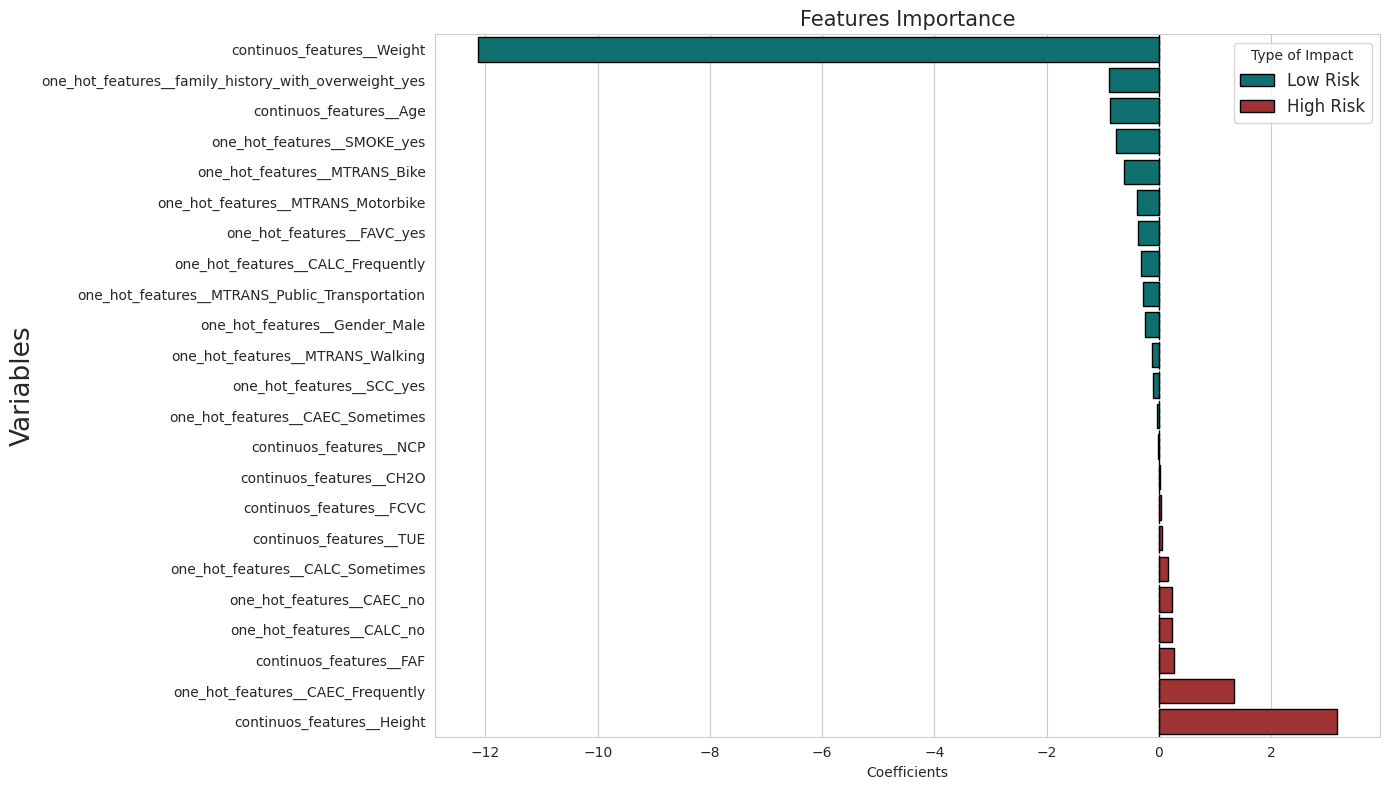

In [0]:
# Data collect
data_ax = coefficients.sort_values().reset_index()
data_ax.columns = ['Feature', 'Coefficient']

# # Creating a category to automatically "paint" the graph
data_ax['Impact'] = data_ax['Coefficient'].apply(lambda x: 'High Risk' if x > 0 else 'Low Risk')

# Figure
plt.figure(figsize = (14, 8))
sns.set_style('whitegrid')

# Barplot
sns.barplot(
    data = data_ax,
    y = 'Feature',
    x = 'Coefficient',
    edgecolor = 'black',
    hue = 'Impact',
    dodge = False,
    palette = {'High Risk': 'firebrick', 'Low Risk': 'teal'}
)

plt.axvline(x = 0, color = 'black', linestyle = '--', linewidth = 1)
plt.title('Features Importance', fontsize = 15)
plt.xlabel('Coefficients', fontsize = 10)
plt.ylabel('Variables', fontsize = 19)
plt.legend(title = 'Type of Impact', loc = 'upper right', fontsize = 12)

plt.tight_layout()
plt.show()

In [0]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.98      0.95        55
           1       0.83      0.73      0.78        52
           2       0.70      0.78      0.74        58
           3       0.79      0.75      0.77        61
           4       0.95      0.86      0.90        81
           5       0.89      1.00      0.94        48
           6       1.00      1.00      1.00        68

    accuracy                           0.87       423
   macro avg       0.87      0.87      0.87       423
weighted avg       0.87      0.87      0.87       423



### Logistic Regression with OvO

In the One-vs-One approach:
* The algorithm trains a binary classifier for every pair of classes in the dataset.
* If there are k classes, this results in *k(k-1)/2* classifiers.
* Each classifier is trained to distinguish between two specific classes, ignoring the rest.
* During prediction, all classifiers are used, and a "voting" mechanism decides the final class by selecting the class that wins the majority of pairwise comparisons.

#### Advantages:
* Suitable for algorithms that are computationally expensive to train on many samples because each binary classifier deals with a smaller dataset (only samples from two classes).
* Can be more accurate in some cases since classifiers focus on distinguishing between two specific classes at a time.

#### Disadvantages:
* Computationally expensive for datasets with a large number of classes due to the large number of classifiers required.
* May lead to ambiguous predictions if voting results in a tie.


#### Training logistic regression model using One-vs-One

In [0]:
model_ovo = OneVsOneClassifier(LogisticRegression(max_iter = 1000))
model_ovo.fit(X_train_preprocessed, y_train)

,"estimator estimator: estimator objectA regressor or a classifier that implements :term:`fit`.When a classifier is passed, :term:`decision_function` will be usedin priority and it will fallback to :term:`predict_proba` if it is notavailable.When a regressor is passed, :term:`predict` is used.",LogisticRegre...max_iter=1000)
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation: the `n_classes * (n_classes - 1) / 2` OVO problems are computed in parallel.``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.``-1`` means using all processors. See :term:`Glossary `for more details.",None
,"penalty penalty: {'l1', 'l2', 'elasticnet', None}, default='l2'Specify the norm of the penalty:- `None`: no penalty is added;- `'l2'`: add a L2 penalty term and it is the default choice;- `'l1'`: add a L1 penalty term;- `'elasticnet'`: both L1 and L2 penalty terms are added... warning:: Some penalties may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionadded:: 0.19 l1 penalty with SAGA solver (allowing 'multinomial' + L1).. deprecated:: 1.8 `penalty` was deprecated in version 1.8 and will be removed in 1.10. Use `l1_ratio` instead. `l1_ratio=0` for `penalty='l2'`, `l1_ratio=1` for `penalty='l1'` and `l1_ratio` set to any float between 0 and 1 for `'penalty='elasticnet'`.",'deprecated'
,"C C: float, default=1.0Inverse of regularization strength; must be a positive float.Like in support vector machines, smaller values specify strongerregularization. `C=np.inf` results in unpenalized logistic regression.For a visual example on the effect of tuning the `C` parameterwith an L1 penalty, see::ref:`sphx_glr_auto_examples_linear_model_plot_logistic_path.py`.",1.0
,"l1_ratio l1_ratio: float, default=0.0The Elastic-Net mixing parameter, with `0 <= l1_ratio <= 1`. Setting`l1_ratio=1` gives a pure L1-penalty, setting `l1_ratio=0` a pure L2-penalty.Any value between 0 and 1 gives an Elastic-Net penalty of the form`l1_ratio * L1 + (1 - l1_ratio) * L2`... warning:: Certain values of `l1_ratio`, i.e. some penalties, may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionchanged:: 1.8 Default value changed from None to 0.0... deprecated:: 1.8 `None` is deprecated and will be removed in version 1.10. Always use `l1_ratio` to specify the penalty type.",0.0
,"dual dual: bool, default=FalseDual (constrained) or primal (regularized, see also:ref:`this equation `) formulation. Dual formulationis only implemented for l2 penalty with liblinear solver. Prefer `dual=False`when n_samples > n_features.",False
,"tol tol: float, default=1e-4Tolerance for stopping criteria.",0.0001
,"fit_intercept fit_intercept: bool, default=TrueSpecifies if a constant (a.k.a. bias or intercept) should beadded to the decision function.",True
,"intercept_scaling intercept_scaling: float, default=1Useful only when the solver `liblinear` is usedand `self.fit_intercept` is set to `True`. In this case, `x` becomes`[x, self.intercept_scaling]`,i.e. a ""synthetic"" feature with constant value equal to`intercept_scaling` is appended to the instance vector.The intercept becomes``intercept_scaling * synthetic_feature_weight``... note:: The synthetic feature weight is subject to L1 or L2 regularization as all other features. To lessen the effect of regularization on synthetic feature weight (and therefore on the intercept) `intercept_scaling` has to be increased.",1
,"class_weight class_weight: dict or 'balanced', default=NoneWeights associated with classes in the form ``{class_label: weight}``.If not given, all classes are supposed to have weight one.The ""balanced"" mode uses the values of y to automatically adjustweights inversely proportional to class frequencies in the input dataas ``n_samples / (n_classes * np.bincount(y))``.Note that these weights will be multiplied with sample_weight (passedthrough t

In [0]:
# Predict the target variable in the test data
y_pred = model_ovo.predict(X_test_preprocessed)

In [0]:
print(f'Accuracy: {accuracy_score(y_test, y_pred):.2f}')

Accuracy: 0.93


In [0]:
# Accessing the FIRST classifier trained within OvO for Example
first_model = model_ovo.estimators_[0]

# Agora sim, esse modelo individual tem coeficientes
coefficients = pd.Series(first_model.coef_[0], 
                         index = preprocessor.get_feature_names_out())

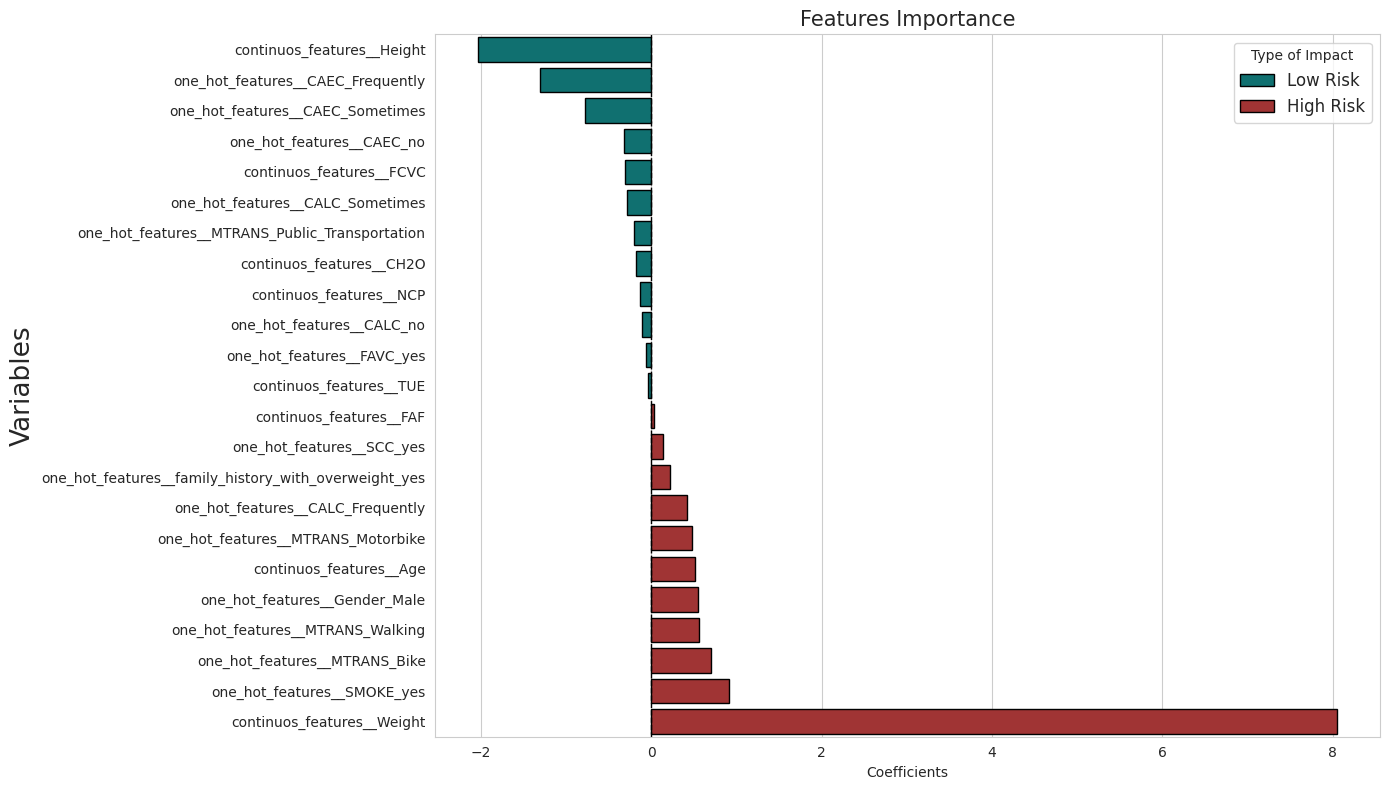

In [0]:
# Data collect
data_ax = coefficients.sort_values().reset_index()
data_ax.columns = ['Feature', 'Coefficient']

# # Creating a category to automatically "paint" the graph
data_ax['Impact'] = data_ax['Coefficient'].apply(lambda x: 'High Risk' if x > 0 else 'Low Risk')

# Figure
plt.figure(figsize = (14, 8))
sns.set_style('whitegrid')

# Barplot
sns.barplot(
    data = data_ax,
    y = 'Feature',
    x = 'Coefficient',
    edgecolor = 'black',
    hue = 'Impact',
    dodge = False,
    palette = {'High Risk': 'firebrick', 'Low Risk': 'teal'}
)

plt.axvline(x = 0, color = 'black', linestyle = '--', linewidth = 1)
plt.title('Features Importance', fontsize = 15)
plt.xlabel('Coefficients', fontsize = 10)
plt.ylabel('Variables', fontsize = 19)
plt.legend(title = 'Type of Impact', loc = 'upper right', fontsize = 12)

plt.tight_layout()
plt.show()

In [0]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      1.00      0.96        55
           1       0.91      0.81      0.86        52
           2       0.84      0.91      0.88        58
           3       0.89      0.90      0.89        61
           4       0.99      0.89      0.94        81
           5       0.92      1.00      0.96        48
           6       1.00      1.00      1.00        68

    accuracy                           0.93       423
   macro avg       0.93      0.93      0.93       423
weighted avg       0.93      0.93      0.93       423




### Conclusion

---

* The comparative analysis establishes the **One-vs-One (OvO)** strategy as significantly superior to the One-vs-Rest (OvR) approach for this specific dataset. The OvO model achieved an **Accuracy of 93%**, outperforming the OvR model (87%). This validates that decomposing the multi-class problem into binary pairs is more effective for distinguishing ordinal obesity levels than a single separation boundary.

* The performance differential is primarily driven by the model's ability to classify "intermediate" categories (Classes 1, 2, and 3), which represent the subtle transitions between Overweight and initial Obesity stages:

  * **Class 2** (likely Overweight Level II) exhibited the most critical improvement, with the **F1-score jumping from 0.74 (OvR) to 0.88 (OvO)**. Similarly, **Class 1** improved from 0.78 to 0.86. This indicates that the OvO strategy successfully mitigates the confusion in the "grey areas" where body mass index characteristics overlap significantly.
  
  * Extreme categories, specifically **Class 6** (Obesity Type III), demonstrated **perfect performance (1.00 Precision/Recall)** in both architectures. This suggests that severe clinical cases possess highly distinct feature signatures that are easily identifiable regardless of the chosen algorithmic strategy.